In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm

# Read data

In [2]:
listings_file_path = 'data/airbnb/listings.csv'
al_file_path = 'data/Alojamento_Local.csv'
df_al = pd.read_csv(al_file_path)
df_listings = pd.read_csv(listings_file_path)
df_listings.head()

C:\Users\joao_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,2.020010e+13,1/28/2020,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...",Fully furnished apartment (35m2). Small inside...,"This apartment is all about Location, next to ...",none,"To get to the city center, tram 15 stops in f...",...,t,f,moderate,f,f,1,1,0,0,0.39
1,25659,https://www.airbnb.com/rooms/25659,2.020010e+13,1/28/2020,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Sunny 1 Bedroom cozy apartment in historic Alf...,"Charming, sunny, cozy apartment in the heart o...",Sunny 1 Bedroom cozy apartment in historic Alf...,none,Alfama is the oldest and most picturesque quar...,...,t,f,moderate,f,f,1,1,0,0,1.61
2,28066,https://www.airbnb.com/rooms/28066,2.020010e+13,1/29/2020,ear the birds,NaN,traditional farm house in a quiet place where ...,traditional farm house in a quiet place where ...,none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
3,29138,https://www.airbnb.com/rooms/29138,2.020010e+13,1/28/2020,Room for rent in shared house,NaN,"05 minutes from city center by subway, 10 minu...","05 minutes from city center by subway, 10 minu...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
4,29248,https://www.airbnb.com/rooms/29248,2.020010e+13,1/28/2020,Apartamento Alfama com vista para o rio!,NaN,"Located in the city center, and great location...","Located in the city center, and great location...",none,NaN,...,t,f,moderate,f,f,1,1,0,0,2.89


# Exploratory data analysis

In [36]:
def missing_data(df, columns):
    df_graph = df[columns]
    #missing data
    total = df_graph.isnull().sum().sort_values(ascending=False)
    percent = (df_graph.isnull().sum()/df_graph.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x='index',y = 'Percent', data= missing_data.reset_index())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    return ax

def feature_dist(df, column_name):
    plt.figure(figsize=(15,4))
    sns.distplot(df[column_name] , fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df[column_name])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('{} distribution'.format(column_name))
    plt.show()

#IN BAR CHARTS, SET PERCENTAGES ABOVE EACH BAR
def set_bar_percentage(ax, df):
    for p in ax.patches:
        ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
          ha='center', va='center', rotation=0, xytext=(0, 10),
          textcoords='offset points')
        
#IN BAR CHARTS, SET THE VALUE ABOVE EACH BAR
def set_bar_amount(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate("{0:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', rotation=0, xytext=(0, 10),
            textcoords='offset points')

## columns distribution

**room type**

In [5]:
print(df_listings['room_type'].value_counts())

Entire home/apt    18219
Private room        5734
Hotel room           634
Shared room          415
Name: room_type, dtype: int64


**accommodates**

2     7312
4     7098
6     3282
3     2251
5     1531
1     1069
8      895
7      498
10     367
9      218
16     151
12     151
14      79
11      42
15      28
13      27
26       1
18       1
32       1
Name: accommodates, dtype: int64

 mu = 4.04 and sigma = 2.38



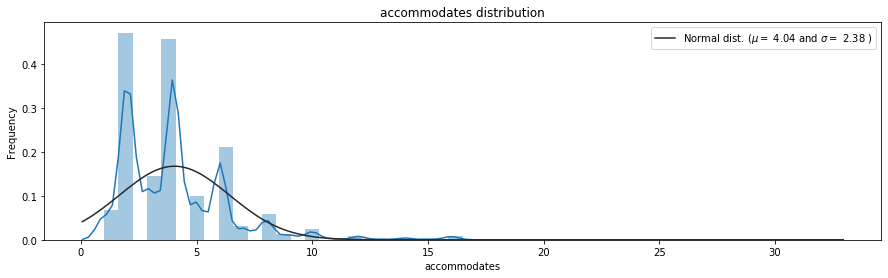

In [6]:
print(df_listings['accommodates'].value_counts())
feature_dist(df_listings[~df_listings['accommodates'].isnull()],'accommodates')

In [7]:
df_listings['accommodates2'] = pd.qcut(df_listings['accommodates'],10, duplicates='drop')
df_listings.accommodates2.value_counts()

(0.999, 2.0]    8381
(3.0, 4.0]      7098
(4.0, 6.0]      4813
(6.0, 32.0]     2459
(2.0, 3.0]      2251
Name: accommodates2, dtype: int64

**property type**

In [8]:
print(df_listings['property_type'].value_counts())

Apartment                 18655
House                      1941
Condominium                 612
Villa                       455
Serviced apartment          417
Guesthouse                  405
Hostel                      363
Bed and breakfast           323
Loft                        290
Boutique hotel              269
Townhouse                   224
Guest suite                 180
Cottage                     177
Camper/RV                   151
Boat                         85
Aparthotel                   83
Tiny house                   63
Hotel                        45
Chalet                       35
Castle                       30
Nature lodge                 30
Other                        29
Farm stay                    26
Bungalow                     23
Windmill                     19
Earth house                  12
Cabin                        12
Campsite                     11
Houseboat                     8
Casa particular (Cuba)        8
Hut                           6
Dome hou

**Bedrooms**

1.0      13343
2.0       6302
3.0       2677
0.0       1180
4.0        808
5.0        368
6.0        156
7.0         66
8.0         35
9.0         33
10.0        12
12.0         4
11.0         2
24.0         1
100.0        1
25.0         1
15.0         1
18.0         1
16.0         1
Name: bedrooms, dtype: int64

 mu = 1.66 and sigma = 1.33



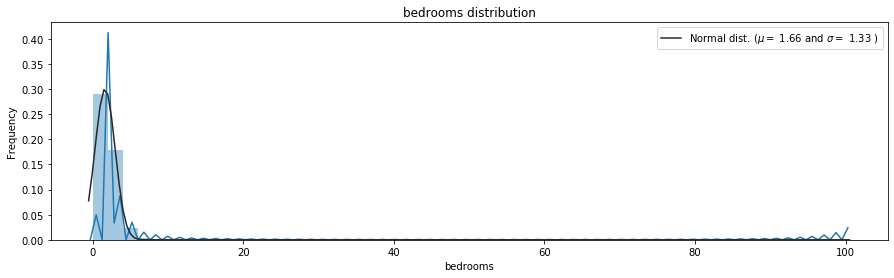

In [9]:
print(df_listings['bedrooms'].value_counts())
feature_dist(df_listings[~df_listings['bedrooms'].isnull()],'bedrooms')

In [10]:
df_listings['bedrooms2'] = pd.qcut(df_listings['bedrooms'],9, duplicates='drop')
df_listings.bedrooms2.value_counts()

(-0.001, 1.0]    14523
(1.0, 2.0]        6302
(2.0, 3.0]        2677
(3.0, 100.0]      1490
Name: bedrooms2, dtype: int64

**beds**

1.0      8556
2.0      6586
3.0      4295
4.0      2432
5.0      1077
6.0       675
0.0       317
7.0       280
8.0       248
9.0       107
10.0       99
12.0       49
11.0       46
16.0       28
14.0       24
13.0       21
15.0       12
18.0        7
17.0        4
30.0        3
22.0        3
20.0        3
19.0        2
27.0        2
24.0        2
25.0        2
26.0        2
21.0        2
23.0        2
100.0       1
28.0        1
35.0        1
50.0        1
38.0        1
Name: beds, dtype: int64

 mu = 2.53 and sigma = 2.16



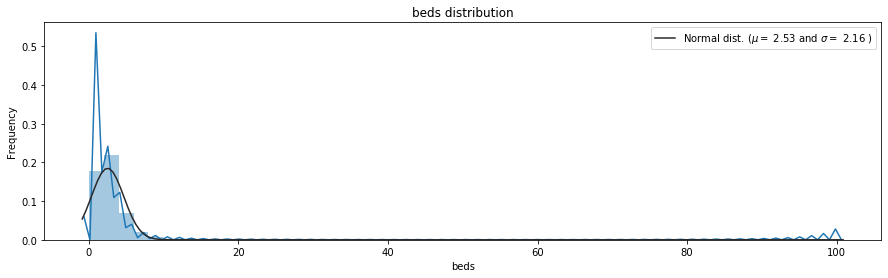

In [11]:
print(df_listings['beds'].value_counts())
feature_dist(df_listings[~df_listings['beds'].isnull()],'beds')

In [12]:
df_listings['beds2'] = pd.qcut(df_listings['beds'],9, duplicates='drop')
df_listings.beds2.value_counts()

(-0.001, 1.0]    8873
(1.0, 2.0]       6586
(2.0, 3.0]       4295
(4.0, 100.0]     2705
(3.0, 4.0]       2432
Name: beds2, dtype: int64

**bathrooms**

1.0     16751
2.0      4408
1.5      1179
3.0      1011
2.5       585
4.0       228
3.5       206
0.0       148
5.0       108
4.5        74
6.0        66
0.5        56
5.5        49
8.0        29
7.0        22
9.0        14
10.0       13
6.5        10
7.5         4
8.5         2
12.0        2
11.5        1
24.0        1
11.0        1
13.5        1
16.5        1
13.0        1
9.5         1
18.0        1
Name: bathrooms, dtype: int64

 mu = 1.44 and sigma = 0.91



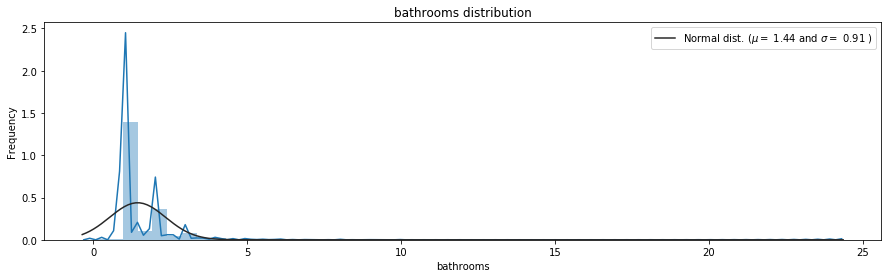

In [13]:
print(df_listings['bathrooms'].value_counts())
feature_dist(df_listings[~df_listings['bathrooms'].isnull()],'bathrooms')

In [14]:
len(df_listings[df_listings['bathrooms'] == 0])

148

In [15]:
df_listings['bathrooms2'] = pd.qcut(df_listings['bathrooms'],4, duplicates='drop')
df_listings.bathrooms2.value_counts()

(-0.001, 1.0]    16955
(1.0, 2.0]        5587
(2.0, 24.0]       2431
Name: bathrooms2, dtype: int64

**bed type**

In [16]:
print(df_listings['bed_type'].value_counts())

Real Bed         24866
Pull-out Sofa      111
Futon               15
Couch                6
Airbed               4
Name: bed_type, dtype: int64


**square feet**

0.0       135
538.0      25
431.0      16
861.0      15
1292.0     15
         ... 
829.0       1
678.0       1
90.0        1
970.0       1
23.0        1
Name: square_feet, Length: 73, dtype: int64

 mu = 627.15 and sigma = 1733.18



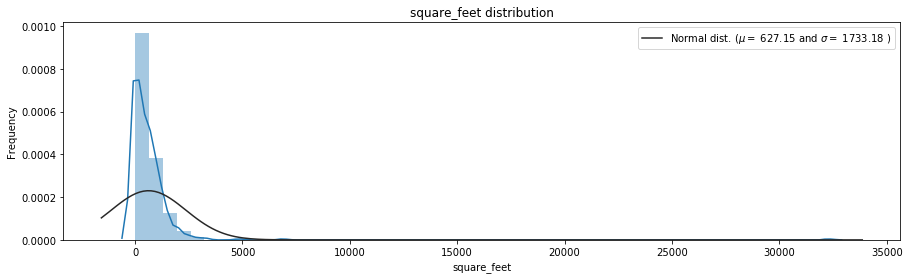

In [17]:
print(df_listings['square_feet'].value_counts())
feature_dist(df_listings[~df_listings['square_feet'].isnull()],'square_feet')

In [18]:
df_listings['square_feet2'] = pd.qcut(df_listings['square_feet'],4, duplicates='drop')
df_listings.square_feet2.value_counts()

(-0.001, 431.0]     213
(431.0, 861.0]      101
(861.0, 32292.0]     87
Name: square_feet2, dtype: int64

**license**

In [19]:
len(df_listings[df_listings['license'].isnull()])

3480

In [20]:
len(df_listings[df_listings['license'] == 'Exempt'])

1746

**ratings**


 mu = 92.45 and sigma = 8.56



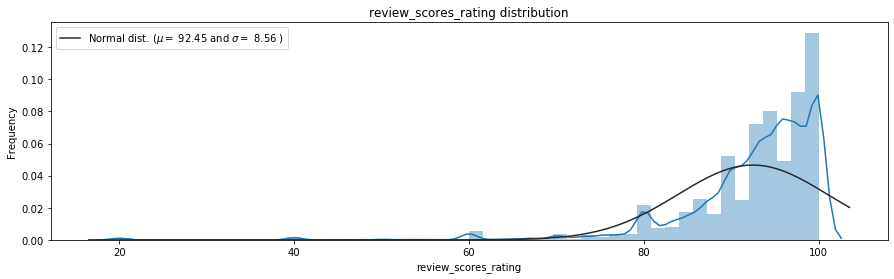


 mu = 9.55 and sigma = 0.85



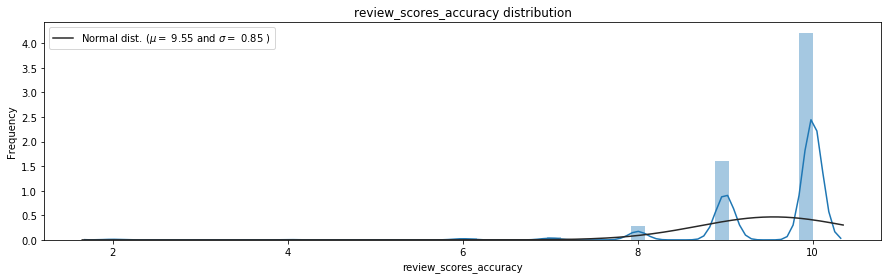


 mu = 9.43 and sigma = 0.91



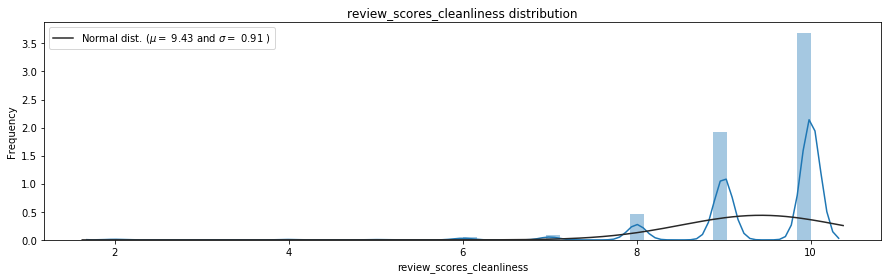


 mu = 9.64 and sigma = 0.82



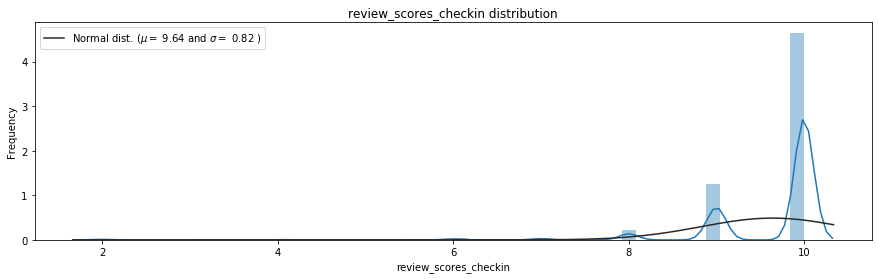


 mu = 9.52 and sigma = 0.76



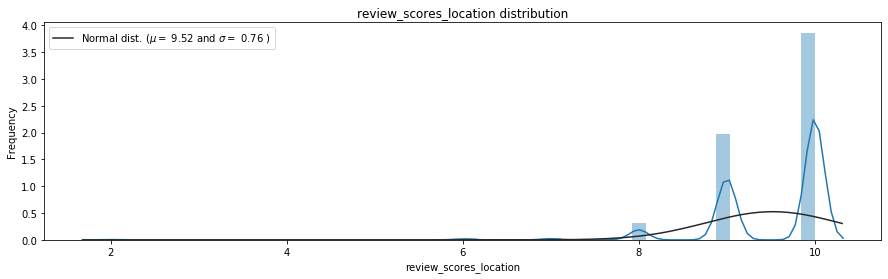


 mu = 9.20 and sigma = 0.92



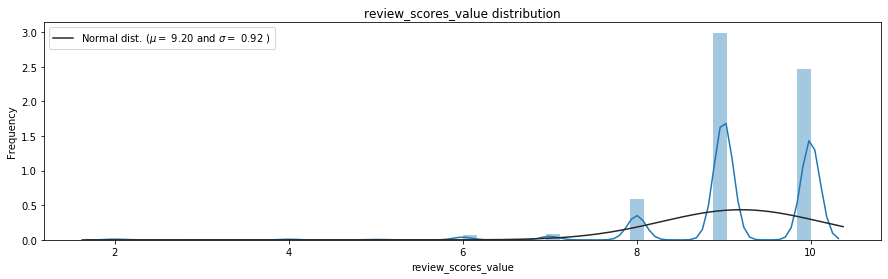

In [21]:
columns = [
'review_scores_rating', 
'review_scores_accuracy', 
'review_scores_cleanliness', 
'review_scores_checkin', 
#'review_scores_communication', 
'review_scores_location', 
'review_scores_value'
]
for c in columns: feature_dist(df_listings[~df_listings[c].isnull()],c)

In [22]:
df_listings[~df_listings['review_scores_rating'].isnull()]['review_scores_rating'].value_counts()

100.0    3311
96.0     1638
97.0     1583
98.0     1500
95.0     1490
93.0     1450
94.0     1203
90.0     1168
99.0     1007
92.0      961
91.0      840
80.0      735
89.0      582
87.0      543
88.0      536
85.0      343
86.0      309
83.0      267
84.0      249
60.0      177
82.0      140
70.0      101
81.0       98
78.0       73
75.0       69
76.0       66
73.0       63
40.0       62
77.0       62
79.0       58
20.0       48
67.0       36
74.0       31
72.0       21
71.0       20
50.0       14
65.0       12
69.0        9
53.0        8
68.0        8
63.0        7
64.0        7
66.0        6
55.0        6
56.0        4
47.0        3
30.0        3
52.0        2
61.0        2
51.0        1
45.0        1
33.0        1
57.0        1
Name: review_scores_rating, dtype: int64

## Merge df_listings with alojamento_local.csv

In [23]:
def intTryParse(value):
    try:
        a = int(value)
        return True
    except ValueError:
        return False

In [24]:
#get only listings where 'license' is not null && != 'Exempt'
df_listings_with_license = df_listings[(~df_listings['license'].isnull())&(df_listings['license'] != 'Exempt')]

#string replace
df_listings_with_license['NrRNAL'] = [s.replace('/AL','').replace('.','') for s in df_listings_with_license['license']]

#get only records where license nr can be converted to int 
df_listings_with_license = df_listings_with_license[[intTryParse(s) for s in df_listings_with_license['NrRNAL']]]

#convert NrRNAL to int before merge the two dataframes
df_listings_with_license['NrRNAL'] = df_listings_with_license['NrRNAL'].astype(int)

#inner join two dataframes
df_result = pd.merge(df_listings_with_license, df_al, how='inner', on='NrRNAL')

C:\Users\joao_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [25]:
print('dataset size: {}'.format(len(df_result)))

dataset size: 17168


In [26]:
list(df_result.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


## missing data plots to show in the report

               Total   Percent
monthly_price  16366  0.953285
weekly_price   16246  0.946295
price              0  0.000000
host_id            0  0.000000
license            0  0.000000


Text(0.5, 1.0, 'Fact table missing values')

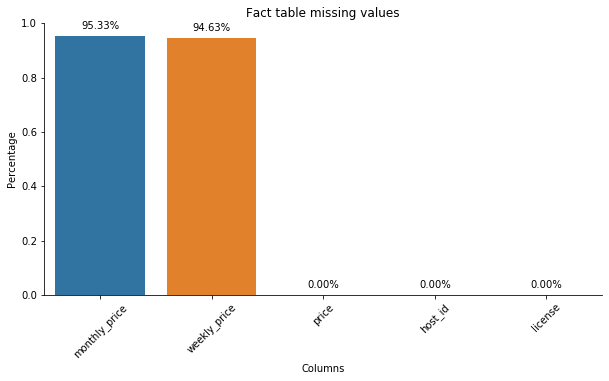

In [40]:
columns = [
'license',
'host_id',
'price',
'weekly_price',
'monthly_price'
]

ax = missing_data(df_result,columns)
set_bar_amount(ax)
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage')
plt.ylim(0,1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Fact table missing values')

**Property dimension**

              Total   Percent
beds             58  0.003378
bedrooms          8  0.000466
bathrooms         5  0.000291
bed_type          0  0.000000
accommodates      0  0.000000
room_type         0  0.000000
Modalidade        0  0.000000


Text(0.5, 1.0, 'Property dimension missing values')

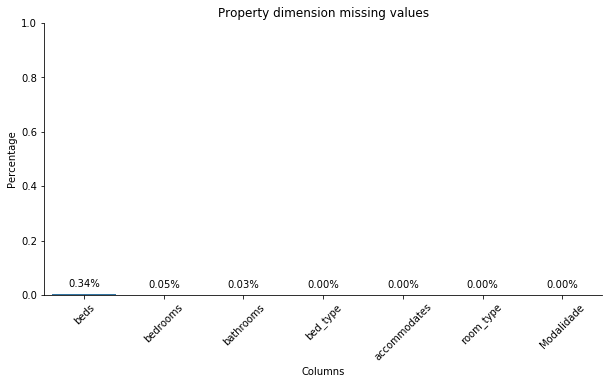

In [45]:
columns = [
'Modalidade',
'room_type',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'bed_type',
]

ax = missing_data(df_result,columns)
set_bar_amount(ax)
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage')
plt.ylim(0,1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Property dimension missing values')

**Review dimensions**

                             Total   Percent
review_scores_value           2171  0.126456
review_scores_location        2170  0.126398
review_scores_checkin         2170  0.126398
review_scores_communication   2169  0.126340
review_scores_accuracy        2168  0.126281
review_scores_cleanliness     2167  0.126223
review_scores_rating          2166  0.126165


Text(0.5, 1.0, 'Review dimension missing values')

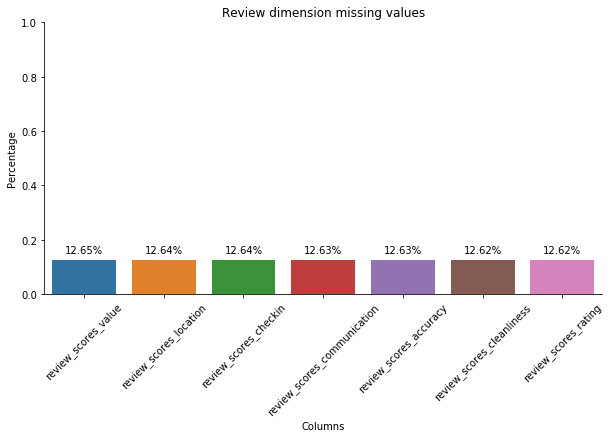

In [42]:
columns = [
'review_scores_rating', 
'review_scores_accuracy', 
'review_scores_cleanliness', 
'review_scores_checkin', 
'review_scores_communication', 
'review_scores_location', 
'review_scores_value'
]

ax = missing_data(df_result,columns)
set_bar_amount(ax)
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage')
plt.ylim(0,1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Review dimension missing values')

**Location dimension**

In [30]:
df_result.Modalidade.value_counts()

Apartamento                             12764
Estabelecimento de Hospedagem            2403
Moradia                                  1549
Estabelecimento de Hospedagem-Hostel      288
Quartos                                   164
Name: Modalidade, dtype: int64

In [31]:
list(df_result.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


               Total   Percent
neighbourhood   3851  0.224313
zipcode          365  0.021260
street             0  0.000000


Text(0.5, 1.0, 'Location dimension missing values')

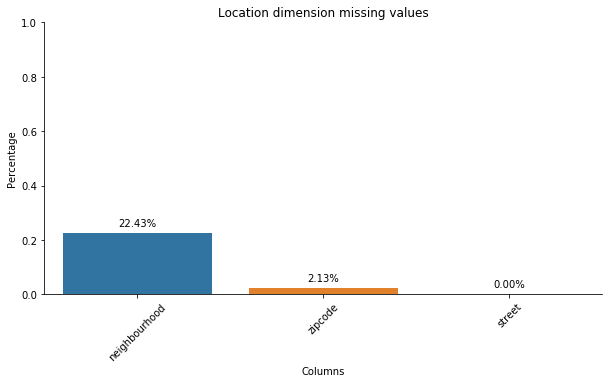

In [43]:
columns = [
    'street',
    'neighbourhood',
    'zipcode'
    ]
ax = missing_data(df_result,columns)
set_bar_amount(ax)
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage')
plt.ylim(0,1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Location dimension missing values')

**Host dimension**

                    Total   Percent
host_response_time   1691  0.098497
host_location          21  0.001223
host_since              0  0.000000
host_name               0  0.000000


Text(0.5, 1.0, 'Host dimension missing values')

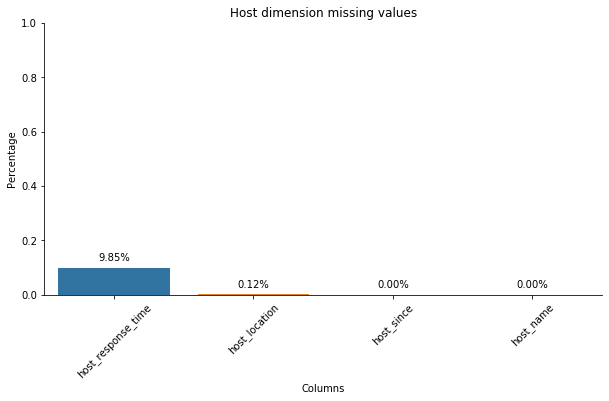

In [44]:
columns = [
'host_name',
'host_since',
'host_location',
'host_response_time'
]
ax = missing_data(df_result,columns)
set_bar_amount(ax)
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage')
plt.ylim(0,1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Host dimension missing values')